# **Setup**

In [11]:
!pip install silence-tensorflow

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for silence-tensorflow: filename=silence_tensorflow-1.2.1-py3-none-any.whl size=4465 sha256=977b2e7f2ae81e55098b2a84a933b8264c47892c471589ddb5a71bc37378c273
  Stored in directory: /root/.cache/pip/wheels/7d/2c/24/e130d6102c0df56631b9db7479d9a6a53c5d97fb06b5f61b98
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl size=5630 sha256=b5e38e73fe3fbb147d2a0224c68e804eb281d89ff36dba585da757bc15c49867
  Stored in directory: /root/.cache/pip/wheels/b6/72/c8/3054a5897ba0713dfa7a941364d68cbd42b0755c8e2ec1c18c
Successfully built silence-tensorflow support_developer


In [1]:
!pip install pennylane-sf --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of pennylane-lightning to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# **Dependencies**

In [2]:
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [5]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from silence_tensorflow import silence_tensorflow

# **Loading Dataset**

In [6]:
mnist_dataset = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

# Reduce dataset size
train_images = train_images[:200]
train_labels = train_labels[:200]
test_images = test_images[:35]
test_labels = test_labels[:35]

# Normalize pixel values within 0 and 1
train_images = train_images / 255

11490434/11490434 [==============================] - 2s 0us/step


# Quantum Hybird-CNN

In [7]:
n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev, interface="tf", diff_method="backprop", mutable=False)
def qnode(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

/usr/local/lib/python3.10/dist-packages/pennylane/qnode.py:400: UserWarning: Received gradient_kwarg mutable, which is not included in the list of standard qnode gradient kwargs.
  warnings.warn(


In [8]:
n_layers = 6
weight_shapes = {"weights": (n_layers, n_qubits)}

In [9]:
qlayer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)

Epoch 1/10
140/140 [==============================] - 79s 484ms/step - loss: 2.2861 - accuracy: 0.1071 - val_loss: 2.2671 - val_accuracy: 0.0667
Epoch 2/10
140/140 [==============================] - 63s 452ms/step - loss: 2.1798 - accuracy: 0.2071 - val_loss: 2.2817 - val_accuracy: 0.1333
Epoch 3/10
140/140 [==============================] - 63s 452ms/step - loss: 1.9880 - accuracy: 0.2714 - val_loss: 2.1599 - val_accuracy: 0.1333
Epoch 4/10
140/140 [==============================] - 63s 453ms/step - loss: 1.8577 - accuracy: 0.2643 - val_loss: 2.0608 - val_accuracy: 0.1333
Epoch 5/10
140/140 [==============================] - 63s 453ms/step - loss: 1.7447 - accuracy: 0.2786 - val_loss: 1.9634 - val_accuracy: 0.1500
Epoch 6/10
140/140 [==============================] - 67s 481ms/step - loss: 1.6748 - accuracy: 0.2429 - val_loss: 1.9586 - val_accuracy: 0.1667
Epoch 7/10
140/140 [==============================] - 63s 451ms/step - loss: 1.6406 - accuracy: 0.2643 - val_loss: 1.8447 - val_ac

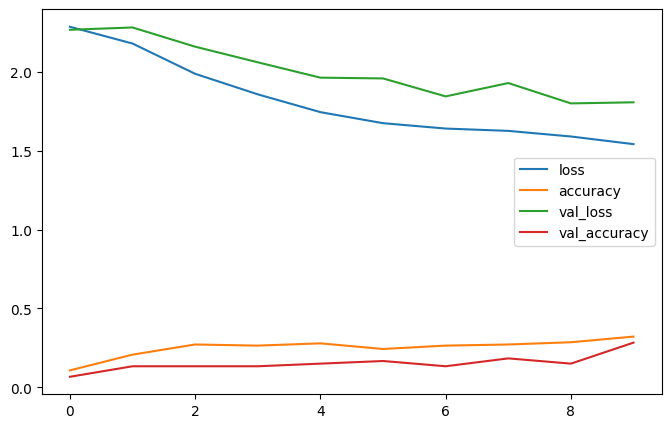

In [12]:
silence_tensorflow()

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(4))
model.add(Activation('relu'))

model.add(qlayer)

model.add(Dense(4))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

train_images = np.array(train_images)
train_labels = np.array(train_labels)

model_history = model.fit(train_images, train_labels, batch_size=1, epochs=10, validation_split=0.3, verbose=1)

print(model.summary())
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.show()

# **Implementation of classical CNN**
Classical Keras CNN for comparison purposes

Epoch 1/10
140/140 [==============================] - 2s 5ms/step - loss: 1.9523 - accuracy: 0.3857 - val_loss: 1.6770 - val_accuracy: 0.5000
Epoch 2/10
140/140 [==============================] - 1s 4ms/step - loss: 0.8917 - accuracy: 0.7714 - val_loss: 1.1761 - val_accuracy: 0.7000
Epoch 3/10
140/140 [==============================] - 1s 4ms/step - loss: 0.3615 - accuracy: 0.9357 - val_loss: 1.1626 - val_accuracy: 0.7333
Epoch 4/10
140/140 [==============================] - 1s 4ms/step - loss: 0.1466 - accuracy: 0.9786 - val_loss: 1.4354 - val_accuracy: 0.7167
Epoch 5/10
140/140 [==============================] - 1s 4ms/step - loss: 0.0633 - accuracy: 0.9929 - val_loss: 1.2366 - val_accuracy: 0.7333
Epoch 6/10
140/140 [==============================] - 1s 4ms/step - loss: 0.0257 - accuracy: 1.0000 - val_loss: 1.3486 - val_accuracy: 0.7667
Epoch 7/10
140/140 [==============================] - 1s 4ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 1.4005 - val_accuracy: 0.7500
Epoch 

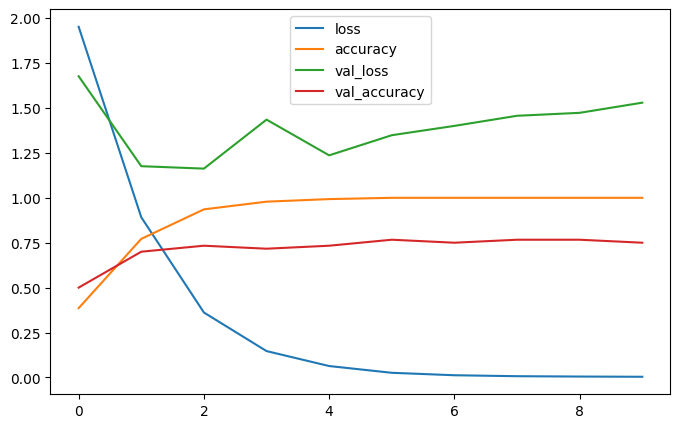

In [13]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

train_images = np.array(train_images)
train_labels = np.array(train_labels)

model_history = model.fit(train_images, train_labels, batch_size=1, epochs=10, validation_split=0.3)

print(model.summary())
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.show()

# **Conclusion**
As can be seen by the graphical represantation of the Training process, the total accuracy of the Quantum hybrid-CNN is substantially lower. This might be due to optimization issues but can also be used as a testament of the instability of Quantum hybrid-CNNs, due to the classical CNN also not being optimized and still performing better. In addition the training time was lower on the classical CNN.